In [ ]:
import pandas as pd
import csv
from nltk.tokenize import RegexpTokenizer
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("taylor_swift_combined_raw.csv",encoding = "utf-8")

In [ ]:
lyrics = df["lyric"].tolist()

In [ ]:
valence = df["valence"].tolist()

In [ ]:
neg_count = 0
pos_count = 0
neu_count = 0
for v in valence:
    if v <= 0.475:
        neg_count += 1
    if v > 0.475 and v < 0.525:
        neu_count += 1
    if v >= 0.525:
        pos_count += 1
print(neg_count, pos_count, neu_count)

2026 934 195


In [ ]:
# test simple tokenization
for lyric in lyrics:
    print(lyric.split())

['He', 'said', 'the', 'way', 'my', 'blue', 'eyes', 'shined']
['Put', 'those', 'Georgia', 'stars', 'to', 'shame', 'that', 'night']
['I', 'said,', '"That\'s', 'a', 'lie"']
['Just', 'a', 'boy', 'in', 'a', 'Chevy', 'truck']
['That', 'had', 'a', 'tendency', 'of', "gettin'", 'stuck']
['On', 'backroads', 'at', 'night']
['And', 'I', 'was', 'right', 'there', 'beside', 'him', 'all', 'summer', 'long']
['And', 'then', 'the', 'time', 'we', 'woke', 'up', 'to', 'find', 'that', 'summer', 'gone']
['But', 'when', 'you', 'think', 'Tim', 'McGraw']
['I', 'hope', 'you', 'think', 'my', 'favorite', 'song']
['The', 'one', 'we', 'danced', 'to', 'all', 'night', 'long']
['The', 'moon', 'like', 'a', 'spotlight', 'on', 'the', 'lake']
['When', 'you', 'think', 'happiness']
['I', 'hope', 'you', 'think', 'that', 'little', 'black', 'dress']
['Think', 'of', 'my', 'head', 'on', 'your', 'chest']
['And', 'my', 'old', 'faded', 'blue', 'jeans']
['When', 'you', 'think', 'Tim', 'McGraw']
['I', 'hope', 'you', 'think', 'of', 'me'

['This', 'is', 'the', 'last', 'time', 'I', 'let', 'you', 'in', 'my', 'door']
['This', 'is', 'the', 'last', 'time,', 'I', "won't", 'hurt', 'you', 'anymore']
['Oh-ho,', 'oh-ho,', 'oh-ho,', 'oh-ho']
['(This', 'is', 'the', 'last', 'time', "I'm", 'asking', 'you', 'this)']
['(Put', 'my', 'name', 'at', 'the', 'top', 'of', 'your', 'list)']
['(This', 'is', 'the', 'last', 'time', "I'm", 'asking', 'you', 'why)']
['(You', 'break', 'my', 'heart)']
['This', 'is', 'the', 'last', 'time', "I'm", 'asking', 'you,', 'last', 'time', "I'm", 'asking', 'you']
['Last', 'time', "I'm", 'asking', 'you', 'this']
['I', 'was', 'reminiscing', 'just', 'the', 'other', 'day']
['While', 'having', 'coffee', 'all', 'alone', 'and', 'Lord,', 'it', 'took', 'me', 'away']
['Back', 'to', 'a', 'first-glance', 'feeling', 'on', 'New', 'York', 'time']
['Back', 'when', 'you', 'fit', 'my', 'poems', 'like', 'a', 'perfect', 'rhyme']
['Took', 'off', 'faster', 'than', 'a', 'green', 'light,', 'go']
['Hey,', 'you', 'skip', 'the', 'conversat

["You're", 'still', 'all', 'over', 'me', 'like', 'a', 'wine-stained', 'dress', 'I', "can't", 'wear', 'anymore']
['Hung', 'my', 'head', 'as', 'I', 'lost', 'the', 'war']
['And', 'the', 'sky', 'turned', 'black', 'like', 'a', 'perfect', 'storm']
['Rain', 'came', 'pouring', 'down']
['When', 'I', 'was', 'drowning,', "that's", 'when', 'I', 'could', 'finally', 'breathe']
['And', 'by', 'morning,', 'gone', 'was', 'any', 'trace', 'of', 'you']
['I', 'think', 'I', 'am', 'finally', 'clean']
['There', 'was', 'nothing', 'left', 'to', 'do']
['When', 'the', 'butterflies', 'turned', 'to', 'dust', 'that', 'covered', 'my', 'whole', 'room']
['So', 'I', 'punched', 'a', 'hole', 'in', 'the', 'roof']
['Let', 'the', 'flood', 'carry', 'away', 'all', 'my', 'pictures', 'of', 'you']
['The', 'water', 'filled', 'my', 'lungs,', 'I', 'screamed', 'so', 'loud']
['But', 'no', 'one', 'heard', 'a', 'thing']
['Ten', 'months', 'sober,', 'I', 'must', 'admit']
['Just', 'because', "you're", 'clean', "don't", 'mean', 'you', "don't

In [ ]:
# expand contractions
for i in range(len(lyrics)):
    lyric = lyrics[i]
    expanded_words = [] 
    for word in lyric.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))   

    expanded_text = ' '.join(expanded_words)
    lyrics[i] = expanded_text
print(lyrics)

['He said the way my blue eyes shined', 'Put those Georgia stars to shame that night', 'I said, "that is a lie"', 'Just a boy in a Chevy truck', "That had a tendency of gettin' stuck", 'On backroads at night', 'And I was right there beside him all summer long', 'And then the time we woke up to find that summer gone', 'But when you think Tim McGraw', 'I hope you think my favorite song', 'The one we danced to all night long', 'The moon like a spotlight on the lake', 'When you think happiness', 'I hope you think that little black dress', 'Think of my head on your chest', 'And my old faded blue jeans', 'When you think Tim McGraw', 'I hope you think of me', 'September saw a month of tears', "And thankin' God that you were not here", 'To see me like that', 'But in a box beneath my bed', 'Is a letter that you never read', 'From three summers back', 'it is hard not to find it all a little bittersweet', "And lookin' back on all of that, it is nice to believe", 'And I am back for the first time 

In [ ]:
# remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
tokenized_arr_of_lyrics = []
for lyric in lyrics:
    tokenized_lyric = tokenizer.tokenize(lyric)
    for i in range(len(tokenized_lyric)):
        word = tokenized_lyric[i]
        tokenized_lyric[i] = word.lower()
    tokenized_arr_of_lyrics.append(tokenized_lyric)
print(tokenized_arr_of_lyrics)

[['he', 'said', 'the', 'way', 'my', 'blue', 'eyes', 'shined'], ['put', 'those', 'georgia', 'stars', 'to', 'shame', 'that', 'night'], ['i', 'said', 'that', 'is', 'a', 'lie'], ['just', 'a', 'boy', 'in', 'a', 'chevy', 'truck'], ['that', 'had', 'a', 'tendency', 'of', 'gettin', 'stuck'], ['on', 'backroads', 'at', 'night'], ['and', 'i', 'was', 'right', 'there', 'beside', 'him', 'all', 'summer', 'long'], ['and', 'then', 'the', 'time', 'we', 'woke', 'up', 'to', 'find', 'that', 'summer', 'gone'], ['but', 'when', 'you', 'think', 'tim', 'mcgraw'], ['i', 'hope', 'you', 'think', 'my', 'favorite', 'song'], ['the', 'one', 'we', 'danced', 'to', 'all', 'night', 'long'], ['the', 'moon', 'like', 'a', 'spotlight', 'on', 'the', 'lake'], ['when', 'you', 'think', 'happiness'], ['i', 'hope', 'you', 'think', 'that', 'little', 'black', 'dress'], ['think', 'of', 'my', 'head', 'on', 'your', 'chest'], ['and', 'my', 'old', 'faded', 'blue', 'jeans'], ['when', 'you', 'think', 'tim', 'mcgraw'], ['i', 'hope', 'you', 't

In [ ]:
tokenized_lyrics = []
for tokenized_arr in tokenized_arr_of_lyrics:
    expanded_text = ' '.join(tokenized_arr)
    tokenized_lyrics.append(expanded_text)

print(tokenized_lyrics)

['he said the way my blue eyes shined', 'put those georgia stars to shame that night', 'i said that is a lie', 'just a boy in a chevy truck', 'that had a tendency of gettin stuck', 'on backroads at night', 'and i was right there beside him all summer long', 'and then the time we woke up to find that summer gone', 'but when you think tim mcgraw', 'i hope you think my favorite song', 'the one we danced to all night long', 'the moon like a spotlight on the lake', 'when you think happiness', 'i hope you think that little black dress', 'think of my head on your chest', 'and my old faded blue jeans', 'when you think tim mcgraw', 'i hope you think of me', 'september saw a month of tears', 'and thankin god that you were not here', 'to see me like that', 'but in a box beneath my bed', 'is a letter that you never read', 'from three summers back', 'it is hard not to find it all a little bittersweet', 'and lookin back on all of that it is nice to believe', 'and i am back for the first time since t

In [ ]:
# remove stop words
tokenized_lyrics_rm_stopwords = []
for lyric in tokenized_lyrics:
    rm_stopword_lyric = ""
    for word in lyric.split():
        if word not in stopwords.words('english'):
            rm_stopword_lyric += " " + word
#     print(rm_stopword_lyric)
    tokenized_lyrics_rm_stopwords.append(rm_stopword_lyric[1:])


In [ ]:
print(tokenized_lyrics_rm_stopwords)

['said way blue eyes shined', 'put georgia stars shame night', 'said lie', 'boy chevy truck', 'tendency gettin stuck', 'backroads night', 'right beside summer long', 'time woke find summer gone', 'think tim mcgraw', 'hope think favorite song', 'one danced night long', 'moon like spotlight lake', 'think happiness', 'hope think little black dress', 'think head chest', 'old faded blue jeans', 'think tim mcgraw', 'hope think', 'september saw month tears', 'thankin god', 'see like', 'box beneath bed', 'letter never read', 'three summers back', 'hard find little bittersweet', 'lookin back nice believe', 'back first time since', 'standin street', 'letter left doorstep', 'first thing read', 'think tim mcgraw', 'someday turn radio', 'hope takes back place', 'oh think', 'mmmm', 'said way blue eyes shine', 'state obvious get perfect fantasy', 'realize love could ever love', 'go tell friends obsessive crazy', 'fine tell mine gay', 'way', 'hate stupid old pickup truck', 'never let drive', 'redneck 

In [ ]:
# pos tagging
lyric_pos_tags = []
for lyric in tokenized_lyrics:
    lyric_pos_tags.append(nltk.pos_tag(lyric.split()))
print(lyric_pos_tags)



[[('he', 'PRP'), ('said', 'VBD'), ('the', 'DT'), ('way', 'NN'), ('my', 'PRP$'), ('blue', 'JJ'), ('eyes', 'NNS'), ('shined', 'VBD')], [('put', 'VBD'), ('those', 'DT'), ('georgia', 'JJ'), ('stars', 'NNS'), ('to', 'TO'), ('shame', 'VB'), ('that', 'DT'), ('night', 'NN')], [('i', 'NN'), ('said', 'VBD'), ('that', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('lie', 'NN')], [('just', 'RB'), ('a', 'DT'), ('boy', 'NN'), ('in', 'IN'), ('a', 'DT'), ('chevy', 'JJ'), ('truck', 'NN')], [('that', 'DT'), ('had', 'VBD'), ('a', 'DT'), ('tendency', 'NN'), ('of', 'IN'), ('gettin', 'NN'), ('stuck', 'NN')], [('on', 'IN'), ('backroads', 'NNS'), ('at', 'IN'), ('night', 'NN')], [('and', 'CC'), ('i', 'NN'), ('was', 'VBD'), ('right', 'RB'), ('there', 'RB'), ('beside', 'VB'), ('him', 'PRP'), ('all', 'DT'), ('summer', 'NN'), ('long', 'RB')], [('and', 'CC'), ('then', 'RB'), ('the', 'DT'), ('time', 'NN'), ('we', 'PRP'), ('woke', 'VBD'), ('up', 'RP'), ('to', 'TO'), ('find', 'VB'), ('that', 'DT'), ('summer', 'NN'), ('gone', 'VB

In [ ]:
# lemmatizing
lemmatizer = WordNetLemmatizer()
dict_of_pos_tag_wordnet = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'J': wordnet.ADJ, 'R': wordnet.ADV}
tokenized_lyrics_lemm = []
for i in range(len(tokenized_lyrics)):
    lyric = tokenized_lyrics[i]
    tokenized_lyrics_lemm.append([])
    for j in range(len(lyric.split())):
        word = lyric.split()[j]
        lyric_pos_tag = lyric_pos_tags[i][j]
        given_tag = lyric_pos_tag[1]
        tag = ""
        if given_tag[0] in dict_of_pos_tag_wordnet:
            tag = dict_of_pos_tag_wordnet[given_tag[0]]
        else:
            tag = dict_of_pos_tag_wordnet['N']
        tokenized_lyrics_lemm[i].append(lemmatizer.lemmatize(lyric_pos_tag[0], tag))
        
for i in range(len(tokenized_lyrics_lemm)):
    lyric_arr = tokenized_lyrics_lemm[i]
    tokenized_lyrics_lemm[i] = " ".join(tokenized_lyrics_lemm[i])
        
print(tokenized_lyrics_lemm)

['he say the way my blue eye shin', 'put those georgia star to shame that night', 'i say that be a lie', 'just a boy in a chevy truck', 'that have a tendency of gettin stuck', 'on backroads at night', 'and i be right there beside him all summer long', 'and then the time we wake up to find that summer go', 'but when you think tim mcgraw', 'i hope you think my favorite song', 'the one we dance to all night long', 'the moon like a spotlight on the lake', 'when you think happiness', 'i hope you think that little black dress', 'think of my head on your chest', 'and my old fade blue jean', 'when you think tim mcgraw', 'i hope you think of me', 'september saw a month of tear', 'and thankin god that you be not here', 'to see me like that', 'but in a box beneath my bed', 'be a letter that you never read', 'from three summer back', 'it be hard not to find it all a little bittersweet', 'and lookin back on all of that it be nice to believe', 'and i be back for the first time since then', 'i be sta

In [ ]:
# remove stop words and lemmatize
tokenized_lyrics_rm_stopwords_lemm = []
for lyric in tokenized_lyrics_lemm:
    rm_stopword_lyric = ""
    for word in lyric.split():
        if word not in stopwords.words('english'):
            rm_stopword_lyric += " " + word
    tokenized_lyrics_rm_stopwords_lemm.append(rm_stopword_lyric[1:])
print(tokenized_lyrics_rm_stopwords_lemm)

['say way blue eye shin', 'put georgia star shame night', 'say lie', 'boy chevy truck', 'tendency gettin stuck', 'backroads night', 'right beside summer long', 'time wake find summer go', 'think tim mcgraw', 'hope think favorite song', 'one dance night long', 'moon like spotlight lake', 'think happiness', 'hope think little black dress', 'think head chest', 'old fade blue jean', 'think tim mcgraw', 'hope think', 'september saw month tear', 'thankin god', 'see like', 'box beneath bed', 'letter never read', 'three summer back', 'hard find little bittersweet', 'lookin back nice believe', 'back first time since', 'standin street', 'letter leave doorstep', 'first thing read', 'think tim mcgraw', 'someday turn radio', 'hope take back place', 'oh think', 'mmmm', 'say way blue eye shine', 'state obvious get perfect fantasy', 'realize love could ever love', 'go tell friend obsessive crazy', 'fine tell mine gay', 'way', 'hate stupid old pickup truck', 'never let drive', 'redneck heartbreak', 're

In [ ]:
pos_tokenized_lyrics_rm_stopwords_lemm = []

for index, row in df.

SyntaxError: invalid syntax (<ipython-input-16-d1c6d98c3755>, line 3)

[[ 3  1  1 ... 16  5 11]]
{'know': 230, 'like': 195, 'say': 187, 'oh': 186, 'go': 163, 'get': 161, 'love': 125, 'want': 124, 'never': 123, 'back': 122}
1686


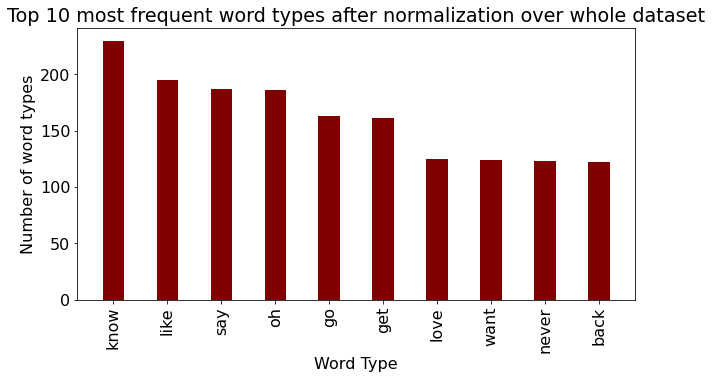

In [ ]:
# Most common words without stopwords and with lemmatization
vectorizer_unigram = CountVectorizer()
vec_tweets_rep = vectorizer_unigram.fit_transform(tokenized_lyrics_rm_stopwords_lemm)
sum_words = vec_tweets_rep.sum(axis=0) 
print(sum_words)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer_unigram.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print(words_freq)
# print(vec_tweets_rep.toarray())

data = {}
for word_count in words_freq[0:10]:
    word = word_count[0]
    count = word_count[1]
    data[word] = count
print(data)
print(len(words_freq))
courses = list(data.keys())
values = list(data.values())

  
fig = plt.figure(figsize = (10, 5))
plt.rcParams['font.size'] = '16'
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

 
plt.xlabel("Word Type")
plt.ylabel("Number of word types")
plt.title("Top 10 most frequent word types after normalization over whole dataset")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Most common words with just lemm
vectorizer_unigram = CountVectorizer()
vec_tweets_rep = vectorizer_unigram.fit_transform(tokenized_lyrics_lemm)
sum_words = vec_tweets_rep.sum(axis=0) 
print(sum_words)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer_unigram.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq)
# print(vec_tweets_rep.toarray())

In [ ]:
# Most common words without stopwords
vectorizer_unigram = CountVectorizer()
vec_tweets_rep = vectorizer_unigram.fit_transform(tokenized_lyrics_rm_stopwords)
sum_words = vec_tweets_rep.sum(axis=0) 
print(sum_words)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer_unigram.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq)
# print(vec_tweets_rep.toarray())

In [ ]:
# add normalizations to CSV
df["Lowercase and Expanded Contraction"] = tokenized_lyrics
df["Without Stopwords"] = tokenized_lyrics_rm_stopwords
df["With Lemmatization"] = tokenized_lyrics_lemm
df["Without Stopwords and With Lemmatization"] = tokenized_lyrics_rm_stopwords_lemm
print(df)

In [ ]:
df.to_csv("taylor_swift_combined_with_normalizations.csv")